In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.1 MB/s eta 0:00:00


In [ ]:
!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 10.0 MB/s eta 0:00:00


In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 89.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 89.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 KB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 21.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 51.7 MB/s eta 0:00:00
    

In [ ]:
!pip install numba --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 35.9 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.37.0
    Uninstalling llvmlite-0.37.0:
      Successfully uninstalled llvmlite-0.37.0
  Attempting uninstall: numba
    Found existing installation: numba 0.54.1
    Uninstalling numba-0.54.1:
      Successfully uninstalled numba-0.54.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.10 requires numba<0.55, but you have numba 0.56.4 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
import random, os
from scipy.stats import skew
from pycaret.utils import enable_colab
from pycaret.regression import *
from bayes_opt import BayesianOptimization
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
'''
2.4070498788196844

lr -> 이상치 제거 : 2.243128161722873
lr -> 이상치 평균변환 : 2.4260724017969113
lr -> 이상치 중앙값변환 : 2.43516510950962
'''

'\n2.4070498788196844\n\nlr -> 이상치 제거 : 2.243128161722873\nlr -> 이상치 평균변환 : 2.4260724017969113\nlr -> 이상치 중앙값변환 : 2.43516510950962\n'

In [ ]:
def seed_everything(seed):
    '''
    seed 고정
    '''
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42)

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/competition/windpower_forecasting/train.csv')
print(train.shape)
train.head()

(19275, 10)


,id,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,snowing,cloudiness,target
0,TRAIN_00000,27.8816,1013.6,46.8,2.4,232.4,0.00,False,0.0,1.180
1,TRAIN_00001,5.7540,1026.6,76.6,3.6,172.0,0.00,False,8.8,8.581
2,TRAIN_00002,20.8220,1016.2,64.8,2.2,206.0,0.06,False,23.0,3.978
3,TRAIN_00003,20.0758,1017.4,72.6,0.8,215.4,0.00,False,0.0,8.301
4,TRAIN_00004,7.5260,1023.2,82.8,1.2,158.0,0.00,False,15.0,1.692


In [ ]:
test = pd.read_csv('/content/drive/MyDrive/competition/windpower_forecasting/test.csv')
print(test.shape)
test.head()

(19275, 9)


,id,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,snowing,cloudiness
0,TEST_00000,20.702000,1021.0,76.4,2.0,104.8,0.00,False,23.0
1,TEST_00001,18.673669,1014.4,59.6,2.4,179.2,0.12,False,32.4
2,TEST_00002,29.908000,1020.6,49.6,2.6,78.0,0.60,False,23.0
3,TEST_00003,24.504000,1014.6,61.0,1.8,118.0,0.00,False,15.0
4,TEST_00004,12.590000,1011.4,70.8,1.8,110.0,0.12,False,34.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19275 entries, 0 to 19274
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              19275 non-null  object 
 1   temperature     19275 non-null  float64
 2   pressure        19275 non-null  float64
 3   humidity        19275 non-null  float64
 4   wind_speed      19275 non-null  float64
 5   wind_direction  19275 non-null  float64
 6   precipitation   19275 non-null  float64
 7   snowing         19275 non-null  bool   
 8   cloudiness      19275 non-null  float64
 9   target          19275 non-null  float64
dtypes: bool(1), float64(8), object(1)
memory usage: 1.3+ MB


In [ ]:
train.describe()

,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,cloudiness,target
count,19275.000000,19275.000000,19275.000000,19275.000000,19275.000000,19275.000000,19275.000000,19275.000000
mean,17.288476,1059.825712,68.948763,2.476970,166.578179,0.076572,25.749748,5.477028
std,7.192604,2544.132430,14.856929,1.359942,57.313099,0.193110,17.628612,3.217581
min,-0.208137,812.600000,22.600000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.712000,1012.600000,57.800000,1.400000,127.000000,0.000000,12.000000,2.956000
50%,16.530000,1016.800000,70.800000,2.200000,166.600000,0.000000,23.000000,4.837000
75%,22.559000,1021.000000,80.800000,3.200000,208.000000,0.060000,37.000000,7.436500
max,37.058000,201373.000000,100.000000,29.800000,338.000000,3.180000,93.600000,17.344000


# 1. EDA 및 전처리
* 전처리 작업 전 EDA 진행 -> 전처리를 해야하는 이유를 확인
* 전처리(이상치 처리, 스케일링, 변수 제거, LabelEncoding, 파생변수 생성)

In [ ]:
# train/test split
# 본 대회는 제출 기간 지남 --> 그냥 train_test_split 후 test데이터로 성능 측정
def tt_split(df=None, tsize=0.2):
  '''
  train_test_split
  '''

  X = df.iloc[:, 1:-1]
  y = df['target']
  X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, test_size=tsize)
  X_train
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = tt_split(train)
print(f'train 데이터 shape : {X_train.shape}')
print(f'test 데이터 shape : {X_test.shape}')

train 데이터 shape : (15420, 8)
test 데이터 shape : (3855, 8)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

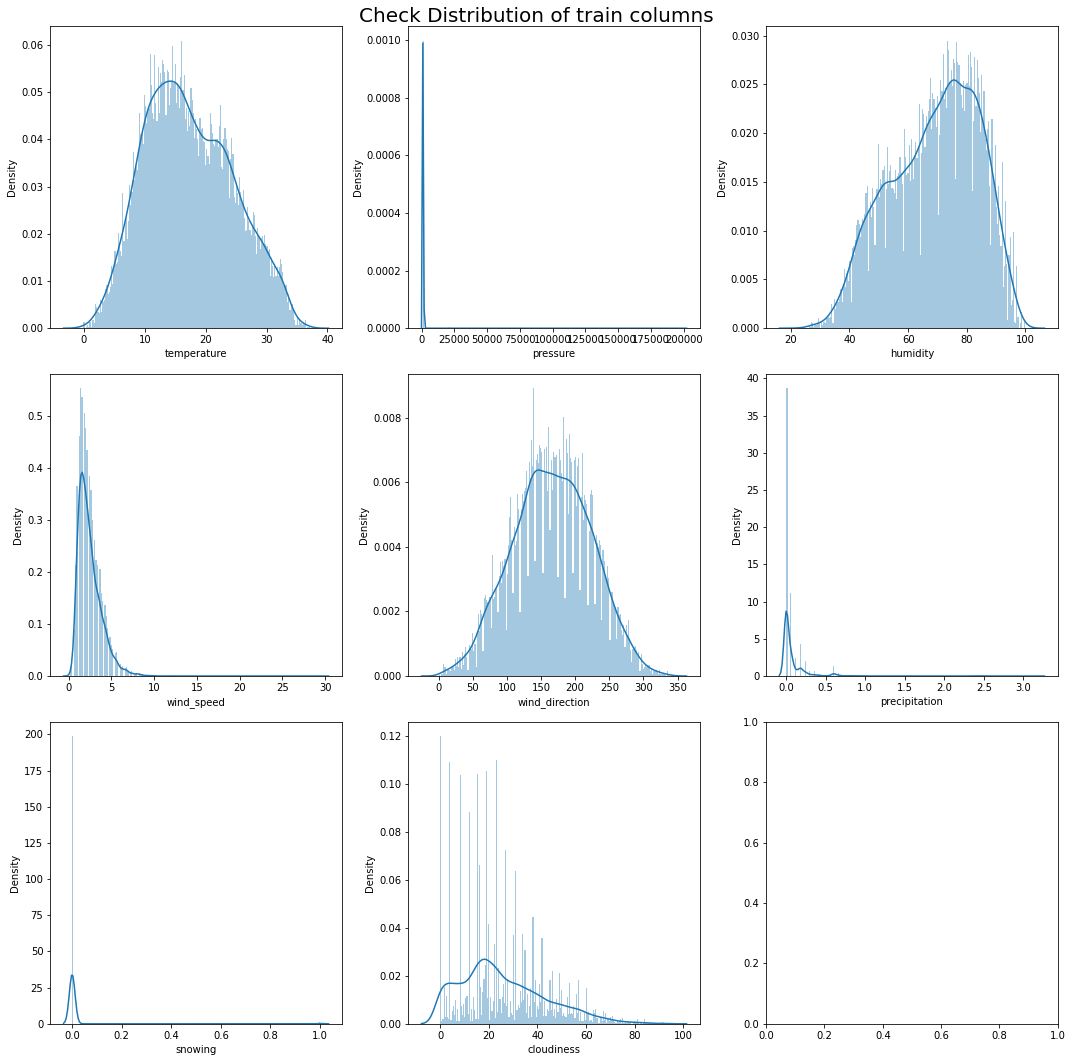

In [ ]:
# target 및 독립변수 분포 파익

def dist_check(df=None):
  
  columns = df.columns
  fig, axes = plt.subplots(3,3, figsize=(15,15))

  for idx, col in enumerate(columns):
    sns.distplot(df[col], bins=200, ax=axes[int(idx/3),int(idx%3)])


  plt.suptitle('Check Distribution of train columns', fontsize=20)
  plt.tight_layout()
  plt.show()

dist_check(X_train)

In [ ]:
def check_skew(df=None):
  skewness = df.apply(lambda x: x.skew()).sort_values(ascending=False)
  return skewness

skewness = check_skew(X_train)
print(skewness)

pressure          82.980375
snowing           12.425110
precipitation      6.855603
wind_speed         1.777729
cloudiness         0.702141
temperature        0.254812
wind_direction    -0.033971
humidity          -0.329786
dtype: float64


In [ ]:
# 이상치 확인
# 확실히 왜도 값이 높은 pressure, precipitation, wind_speed에 대해 이상치 값이 많이 나오기는 함

def check_outliers(df, weight=1.5):
  '''
  연속형 변수(Snowing 빼고 전부)에 대해 이상치 확인
  '''
  df = df.copy()
  num_cols = ['temperature', 'pressure',  'humidity', 'wind_speed', 'wind_direction', 'precipitation', 'cloudiness']

  for col in num_cols:
    data = df[col]
    quantile_25 = np.percentile(data.values, 25)
    quantile_75 = np.percentile(data.values, 75)

    iqr = quantile_75 - quantile_25
    iqr_weights = iqr * weight

    lowest_value = quantile_25 - iqr_weights
    highest_value = quantile_75 + iqr_weights

    outlier_index = df[(data < lowest_value) | (data > highest_value)].index
    print(f'{col}의 이상치 인덱스 : ', '\t', list(outlier_index), '\n 이상치 개수', len(list(outlier_index)))
  
check_outliers(X_train)

temperature의 이상치 인덱스 :  	 [] 
 이상치 개수 0
pressure의 이상치 인덱스 :  	 [5489, 5358, 7462, 15445, 6045, 5155, 11375, 11583, 3422, 11541, 10559, 18478, 10182, 19243, 3107, 18953, 7250, 7139, 13334, 10322, 1544, 6641, 7904, 9201, 14658, 13355, 5081, 1326, 435, 18355, 5620, 14576, 10583, 2996, 16254, 9623, 15163, 14328, 4981, 11227, 18885, 7748, 3942, 13524, 5352, 16437, 5568, 8675, 15946, 16051, 14500, 14067, 7826, 17313, 12505, 1748, 8425, 932, 2918, 8631, 10872, 15953, 3362, 14017, 13668, 11612, 17806, 5186, 266, 14237, 12029, 11793, 4754, 8229, 7466, 4849, 6218, 6442, 13727, 16027, 12603, 2802, 11782, 3042, 18635, 6011, 13987, 13039, 2453, 8784, 9815, 16225, 17031, 8271, 8114, 3763, 8072, 15327, 3087, 9910, 12364, 14619, 16523, 2755, 16956, 6504, 14399, 7682, 6098, 14569, 14126, 15414, 11042, 15779, 2332, 18495, 19035, 6661, 15181, 3451, 1923, 407, 15386, 16736, 15468, 2206, 3689, 11624, 3286, 12825, 7380, 13188, 10311, 18808, 12663, 520, 5528, 2326, 6402, 388, 16878, 315, 1149, 18215, 9406, 1

In [ ]:
train_stats = X_train.describe().T[['mean', '50%', '25%', '75%']]
train_stats['IQR'] = train_stats['75%'] - train_stats['25%']
train_stats['lowest_value'] = train_stats['25%'] - (train_stats['IQR'] * 1.5)
train_stats['highest_value'] = train_stats['75%'] + (train_stats['IQR'] * 1.5)
train_stats

,mean,50%,25%,75%,IQR,lowest_value,highest_value
temperature,17.311305,16.5649,11.759683,22.5516,10.791917,-4.428193,38.739476
pressure,1053.385733,1016.8000,1012.800000,1021.0000,8.200000,1000.500000,1033.300000
humidity,68.941530,70.8000,57.800000,80.8000,23.000000,23.300000,115.300000
wind_speed,2.473671,2.2000,1.400000,3.2000,1.800000,-1.300000,5.900000
wind_direction,166.236433,166.0000,126.150000,208.0000,81.850000,3.375000,330.775000
precipitation,0.077482,0.0000,0.000000,0.0600,0.060000,-0.090000,0.150000
cloudiness,25.730739,23.0000,12.000000,37.0000,25.000000,-25.500000,74.500000


In [ ]:
"""
def change_outliers(df=None, method='none'):
  '''
  train_stats 데이터셋과 df 컬럼별 값을 비교하며 이상치 제거/대체
  
  1) method='remove' -> 이상치 제거
  2) method='mean'   -> 평균값 대체
  3) method='median' -> 중앙값 대체
  '''
  df = df.copy()
  num_cols = ['temperature', 'pressure', 'humidity', 'wind_speed', 'wind_direction', 'precipitation', 'cloudiness']

  if method == 'remove':
    for idx, col in enumerate(num_cols):
      data = df[col]
      outlier_index = df[(data < train_stats['lowest_value'][idx]) | (data > train_stats['highest_value'][idx])].index
      df.drop(outlier_index, axis=0, inplace=True)
  
  elif method == 'mean':
    for idx, col in enumerate(num_cols):
      data = df[col]
      mean = train_stats['mean'][col]
      df[(data < train_stats['lowest_value'][idx]) | (data > train_stats['highest_value'][idx])] = np.nan
      df.fillna(mean, axis=0, inplace=True)

  elif method == 'median':
    for idx, col in enumerate(num_cols):
      data = df[col]
      median = train_stats['50%'][col]
      df[(data < train_stats['lowest_value'][idx]) | (data > train_stats['highest_value'][idx])] = np.nan
      df.fillna(median, axis=0, inplace=True)
  
  else : pass
    
  return df

X_train['target'] = y_train
X_train_2 = change_outliers(X_train, method='remove')
print(X_train_2.shape)
X_train_2.head()
"""

In [ ]:
change_cols = ['pressure', 'wind_speed', 'precipitation']

#scaler = MinMaxScaler()
scaler = StandardScaler()
#scaler = MaxAbsScaler()

'''
X_train[change_cols] = np.log1p(X_train[change_cols])
X_test[change_cols] = np.log1p(X_test[change_cols])
'''

scaler.fit(X_train[change_cols])
X_train[change_cols] = scaler.transform(X_train[change_cols])
X_test[change_cols] = scaler.transform(X_test[change_cols])

In [ ]:
skewness = check_skew(X_train)
print(skewness)

pressure          40.804581
snowing           12.425110
precipitation      3.972105
cloudiness         0.702141
wind_speed         0.325934
temperature        0.254812
wind_direction    -0.033971
humidity          -0.329786
dtype: float64


In [ ]:
# 파생 변수 생성

def wind_direction_cat(x):
  '''
  wind_direction을 범주형으로 변환
  315~360, 0~45 : North   45~135 : East    135~225 : South     225 ~ 315 : West
  --> 결과 애매... 
  --> RF 빼고는 모든 모델에서 좋게 나옴
  + wind_direction과 wind_direction_cat을 같이 학습하는게 더 좋은 결과!
  '''
  if (315<= x <=360) or (0<= x <=45):
    cat = 'North'
  
  elif (45<= x <=135):
    cat = 'East'
  
  elif (135<= x <=225):
    cat = 'South'

  else: cat = 'West'

  return cat


def wind_speed_cat(x):
  '''
  wind_speed를 범주형으로 변환
  '''
  if (0<= x <=0.2):
      cat = 0 # 실바람
      
  elif (0.3<= x <=1.5):
      cat = 1 # 실바람

  elif (1.6<= x <=3.3):
      cat = 2 # 남실바람

  elif (3.4<= x <= 5.4):
      cat = 3 # 산들바람

  elif (5.5<=x<=7.9):
      cat = 4 # 건들바람
      
  elif (8.0<=x<=10.7):
      cat = 5 # 흔들바람
      
  elif (8.0<=x<=13.8):
      cat = 6 # 된바람
      
  elif (13.9<=x<=17.1):
      cat = 7 # 센바람
      
  elif (17.2<=x<=20.7):
      cat = 8 # 큰바람
      
  elif (20.8<=x<=24.4):
      cat = 9 # 큰센바람
      
  elif (20.8<=x<=28.4):
      cat = 10 # 노대바람
      
  elif (28.5<=x<=32.6):
      cat = 11 # 왕바람

  else: cat = 12

  return cat

# X_train['wind_direction_cat'] = X_train['wind_direction'].apply(lambda x: wind_direction_cat(x))
# X_test['wind_direction_cat'] = X_test['wind_direction'].apply(lambda x: wind_direction_cat(x))
X_train['wind_speed_cat'] = X_train['wind_speed'].apply(lambda x: wind_speed_cat(x))
X_test['wind_speed_cat'] = X_test['wind_speed'].apply(lambda x: wind_speed_cat(x))
X_train.head()

,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,snowing,cloudiness,wind_speed_cat
5489,8.272000,-0.008166,80.6,0.239982,152.4,-0.390391,False,8.0,12
12559,23.824000,-0.014703,82.2,-0.642495,150.0,-0.390391,False,23.0,12
18718,21.958000,-0.015994,45.4,0.681220,62.0,-0.390391,False,16.0,1
5230,16.638731,-0.013757,92.0,-0.936653,178.2,-0.088082,False,22.4,12
8568,22.898000,-0.014617,53.2,-0.936653,110.4,-0.390391,False,0.0,12


In [ ]:
def labelencoding(df=None):
  '''
  범주형 변수에 대해 LabelEncoding 수행
  범주형 변수는 col에 저장하고, 개수가 2개 이상인 경우 리스트로 만들어야!
  '''

  df = df.copy()
  #cols = ['snowing', 'wind_direction_cat']
  cols = 'snowing'
  le = LabelEncoder()
  
  df[cols] = le.fit_transform(list(df[cols]))
  
  '''
  for col in cols:
    df[col] = le.fit_transform(list(df[col]))
  '''
  return df

X_train = labelencoding(X_train)
X_test = labelencoding(X_test)
X_train.head()

,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,snowing,cloudiness,wind_speed_cat
5489,8.272000,-0.008166,80.6,0.239982,152.4,-0.390391,0,8.0,12
12559,23.824000,-0.014703,82.2,-0.642495,150.0,-0.390391,0,23.0,12
18718,21.958000,-0.015994,45.4,0.681220,62.0,-0.390391,0,16.0,1
5230,16.638731,-0.013757,92.0,-0.936653,178.2,-0.088082,0,22.4,12
8568,22.898000,-0.014617,53.2,-0.936653,110.4,-0.390391,0,0.0,12


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

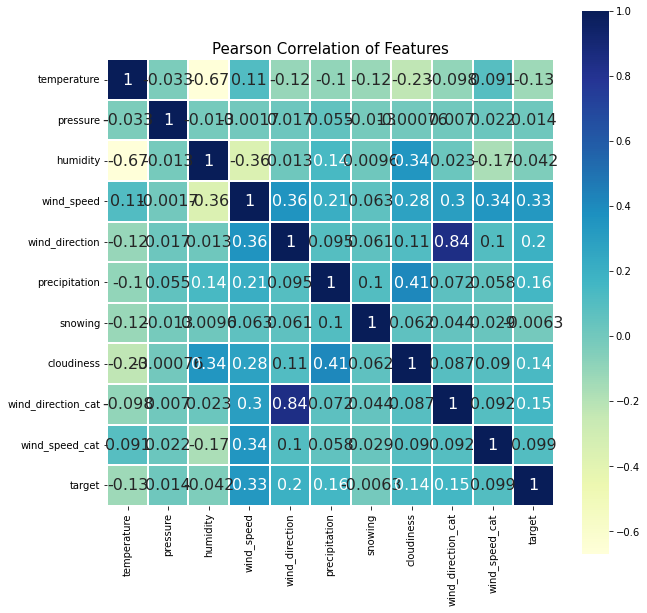

In [ ]:
# 변수별 상관관계 확인
# 딱히 제거할 변수는 없어보임!
# 그나마 Target에 제일 영향을 주는 변수는 wind_speed, wind_direction...
train_copy = X_train.copy()
train_copy['target'] = y_train
plt.figure(figsize=(10, 10))
plt.title('Pearson Correlation of Features', fontsize=15)
sns.heatmap(train_copy.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True,
            cmap='YlGnBu', linecolor='white', annot=True, annot_kws={'size' : 16})

# 2. Modeling
* EDA 및 전처리 성능을 체크용 모델 -> LinearRegression
* 이후 전처리 끝나면 다양한 모델 시도 -> Ridge, Lasso, ElasticNet, ...
* Parameter Tuning(Grid Search, Bayesian Optimizer, Optuna, Pycaret)
* 최적 모델 도출 + 앙상블 시도??

In [ ]:
# LinearRegression Baseline

lr = LinearRegression()

lr.fit(X_train, y_train)
preds = lr.predict(X_test)
print(mean_absolute_error(y_test, preds))

2.4056726182016637


In [ ]:
# Ridge, Lasso, ElasticNet Baseline

ridge = Ridge()
lasso = Lasso()
elast = ElasticNet()

ridge.fit(X_train, y_train)
preds_1 = ridge.predict(X_test)

lasso.fit(X_train, y_train)
preds_2 = lasso.predict(X_test)

elast.fit(X_train, y_train)
preds_3 = elast.predict(X_test)

print(mean_absolute_error(y_test, preds_1))
print(mean_absolute_error(y_test, preds_2))
print(mean_absolute_error(y_test, preds_3))

2.405685373800222
2.5204266575489096
2.510037201530235


In [ ]:
def grid_search(model, **set_params):
  '''
  grid_search용 함수
  '''
  gs_model = GridSearchCV(model, param_grid=set_params, scoring='neg_mean_absolute_error', cv=5, refit=True, n_jobs=-1, verbose=0)
  gs_model.fit(X_train, y_train)
  print(gs_model.best_params_)
  print(abs(gs_model.best_score_))
  return gs_model

In [ ]:
# Ridge - Best params

set_params = {'alpha' : [0.1, 0.3, 0.5, 0.7, 0.9, 1],
              'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
              'max_iter' : [1000, 3000, 5000, 7000, 10000, 15000],
              'fit_intercept' : [True, False]}
gs_ridge = grid_search(ridge, **set_params)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
360 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py", line 1134, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py", line 825, in fit
    raise ValueError(
ValueError: 'lbfgs' solver can be used 

{'alpha': 0.1, 'fit_intercept': True, 'max_iter': 15000, 'solver': 'sag'}
2.3520485718086714


In [ ]:
# Lasso - Best params

set_params = {'alpha' : [0.1, 0.3, 0.5, 0.7, 0.9, 1],
              'max_iter' : [1000, 3000, 5000, 7000, 10000, 15000],
              'fit_intercept' : [True, False],
              'selection' : ['cyclic', 'random']}
gs_lasso = grid_search(lasso, **set_params)

{'alpha': 0.1, 'fit_intercept': False, 'max_iter': 1000, 'selection': 'random'}
2.38936747624194


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.397e+02, tolerance: 6.198e+01
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# ElasticNet - Best Params

set_params = {'alpha' : [0.1, 0.3, 0.5, 0.7, 0.9, 1],
              'l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9],
              'max_iter' : [1000, 3000, 5000, 7000, 10000, 15000],
              'fit_intercept' : [True, False],
              'selection' : ['cyclic', 'random']}

gs_elastic = grid_search(elast, **set_params)

{'alpha': 0.1, 'fit_intercept': False, 'l1_ratio': 0.9, 'max_iter': 7000, 'selection': 'random'}
2.3912447309705396


In [ ]:
gs_ridge_preds = gs_ridge.predict(X_test)
gs_lasso_preds = gs_lasso.predict(X_test)
gs_elast_preds = gs_elastic.predict(X_test)

print(mean_absolute_error(y_test, gs_ridge_preds),'\n')
print(mean_absolute_error(y_test, gs_lasso_preds),'\n')
print(mean_absolute_error(y_test, gs_elast_preds),'\n')


2.405631362802469 

2.4494971041194087 

2.451514123180216 



In [ ]:
# RandomForest, LightGBM, Catboost Baseline

rf = RandomForestRegressor(random_state=42)
lgbm = LGBMRegressor(random_state=42)
cb = CatBoostRegressor(verbose=0, random_state=42)
xgb = XGBRegressor(random_state=42)

rf.fit(X_train, y_train)
preds_1 = rf.predict(X_test)

lgbm.fit(X_train, y_train)
preds_2 = lgbm.predict(X_test)

cb.fit(X_train, y_train)
preds_3 = cb.predict(X_test)

xgb.fit(X_train, y_train)
preds_4 = xgb.predict(X_test)

print(mean_absolute_error(y_test, preds_1))
print(mean_absolute_error(y_test, preds_2))
print(mean_absolute_error(y_test, preds_3))
print(mean_absolute_error(y_test, preds_4))

2.04246122062271
2.228690925102616
2.1724201178209372
2.1852863571883177


In [ ]:
# Random Forest - Best Params ???

set_params = {'n_estimators' : [100, 300, 500, 700, 1000],
              #'criterion' : ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
              'max_depth' : [4, 5, 6, 7, 8, 9, 10, 11, 12],
              'min_samples_split' : [2, 3],
              'min_samples_leaf' : [1, 2]
              }
gs_rf = grid_search(rf, **set_params)

{'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
2.1327995862187477


In [ ]:
# Random Forest - Optuna

def rf_objective(trial):
  '''
  함수 안에 모델 및 하이퍼 파라미터 지정
  모델마다 각각 파라미터가 달라 모델별로 함수를 생성해야!
  trial.suggest_int() : 범위 내 정수형 값을 선택
  trial.suggest_categorical() : List 데이터 내 데이터 중 선택
  trial.suggest_uniform() : 범위 내 균일 분포를 값으로 선택     ex. subsample, 0.2, 0.8
  trial.suggest_discrete_uniform() : 범위 내 이산 균등 분포를 값으로 선택   ex. max_features, 0.05, 1, 0.05
  trial.suggest_loguniform() : 범위 내 로그함수 선상의 값을 선택()   ex. learniing_rate, 1e-6, 1e-3
  '''
  max_depth = trial.suggest_int('max_depth', 1, 10)
  max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 2, 1000)
  n_estimators = trial.suggest_int('n_estimators', 100, 1000)
  min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

  model = RandomForestRegressor(max_depth=max_depth, max_leaf_nodes=max_leaf_nodes, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, 
                                n_estimators=n_estimators, n_jobs=-1, random_state=42)
  model.fit(X_train, y_train)
  score = mean_absolute_error(model.predict(X_test), y_test)

  return score

rf_study = optuna.create_study(direction='minimize')
rf_study.optimize(rf_objective, n_trials=1000)
print(f'Best Trial : {rf_study.best_trial.value}, \nParams : {rf_study.best_trial.params}')

opt_rf = RandomForestRegressor(max_depth=rf_study.best_params['max_depth'], max_leaf_nodes=rf_study.best_params['max_leaf_nodes'],
                               n_estimators=rf_study.best_params['n_estimators'], min_samples_split=rf_study.best_params['min_samples_split'], 
                               min_samples_leaf=rf_study.best_params['min_samples_leaf'], n_jobs=-1, random_state=42)

[I 2023-03-08 13:13:44,670] A new study created in memory with name: no-name-096def6e-6f66-4749-8454-b2a98503e936
[I 2023-03-08 13:13:57,869] Trial 0 finished with value: 2.4714884304254277 and parameters: {'max_depth': 2, 'max_leaf_nodes': 307, 'n_estimators': 765, 'min_samples_split': 5, 'min_samples_leaf': 9}. Best is trial 0 with value: 2.4714884304254277.
[I 2023-03-08 13:14:20,583] Trial 1 finished with value: 2.3058376713663606 and parameters: {'max_depth': 7, 'max_leaf_nodes': 687, 'n_estimators': 642, 'min_samples_split': 3, 'min_samples_leaf': 7}. Best is trial 1 with value: 2.3058376713663606.
[I 2023-03-08 13:14:54,171] Trial 2 finished with value: 2.2776541213650563 and parameters: {'max_depth': 8, 'max_leaf_nodes': 453, 'n_estimators': 674, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 2 with value: 2.2776541213650563.
[I 2023-03-08 13:15:13,264] Trial 3 finished with value: 2.42236129617554 and parameters: {'max_depth': 3, 'max_leaf_nodes': 558, 'n_estim

Best Trial : 2.2199769448124522, 
Params : {'max_depth': 10, 'max_leaf_nodes': 953, 'n_estimators': 702, 'min_samples_split': 4, 'min_samples_leaf': 2}


In [ ]:
opt_rf.fit(X_train, y_train)
pred_t = opt_rf.predict(X_test)
print(mean_absolute_error(pred_t, y_test))

2.2203343447490704


In [ ]:
"""
# cross validation score
X = train_log.iloc[:, :-1]
y = train_log['target']
scores = cross_val_score(rf, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

total_mae = 0
for score in scores:
  score = abs(score) / 5
  total_mae += score

np.round(total_mae, 4)
"""

2.0472

In [ ]:
Baseline : 2.4070498788196826
minmax : 2.4070498788196826
standard : 2.407049878819683
log : 2.4067998360545917
다른 모델들에 대해서도 큰 차이는 없음!

In [ ]:
# pycaret - Regressor models
# TypeError: unhashable type: 'Series'   --> DF 하나로 합치기

def col_concat(X, y):
  df = X.copy()
  df['target'] = y
  return df

train_2 = col_concat(X_train, y_train)
test_2 = col_concat(X_test, y_test)

train_2.head()

,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,snowing,cloudiness,wind_speed_cat,target
5489,8.272000,6.942543,80.6,1.335001,152.4,0.000000,0,8.0,1,3.595
12559,23.824000,6.927754,82.2,0.955511,150.0,0.000000,0,23.0,1,8.142
18718,21.958000,6.924809,45.4,1.481605,62.0,0.000000,0,16.0,1,8.182
5230,16.638731,6.929908,92.0,0.788457,178.2,0.058269,0,22.4,1,3.927
8568,22.898000,6.927950,53.2,0.788457,110.4,0.000000,0,0.0,1,9.080


In [ ]:
# Pycaret Setup
'''
data = 훈련 데이터 지정, test_data를 통해 검증 데이터 지정
target = 레이블 지정
categorical_features / numeric_features
session_id : seed 지정
use_gpu=True
'''
sup = setup(data=train_2, target='target', test_data=test_2,
            categorical_features = ['snowing', 'wind_speed_cat'],
            numeric_features = ['temperature', 'pressure', 'humidity', 'wind_speed', 'wind_direction', 'precipitation', 'cloudiness'],
            session_id = 42, n_jobs=1, 
            use_gpu=True)

,Description,Value
0,session_id,42
1,Target,target
2,Original Data,"(15420, 10)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(15420, 13)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['snowing',
                                                            'wind_speed_cat'],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=['temperature',
                                                          'pressure',
                                                          'humidity',
                                                          'wind_speed',
                                                          'wind_direction',
                                                          'precipitation',
                                                          'cloudiness'],
                       

In [ ]:
models()  # pycaret에서 사용될 Regerssor 모델 확인

INFO:logs:gpu_param set to True


,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
'''
compare_models : 모델 성능 비교
n_select = 3 --> 평가지표로 비교 시 성능 제일 좋은 3개의 모델 추출
             --> 이후 blended model 생성에 사용
'''
pycaret_reg_best_3 = compare_models(n_select=3, sort='MAE', include=['lr', 'lasso', 'ridge', 'en', 
                                                                     'svm','rf', 'et', 'ada', 'gbr', 
                                                                     'mlp', 'xgboost', 'lightgbm', 'catboost'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.9846,7.1036,2.6647,0.3091,0.4526,0.6329,3.699
rf,Random Forest Regressor,2.0258,7.0321,2.6511,0.3161,0.4517,0.6453,7.324
catboost,CatBoost Regressor,2.1301,7.4799,2.7344,0.2725,0.4623,0.6679,3.908
xgboost,Extreme Gradient Boosting,2.1501,7.7686,2.7866,0.2443,0.4680,0.6634,0.248
lightgbm,Light Gradient Boosting Machine,2.1685,7.6625,2.7676,0.2547,0.4677,0.6820,0.168
gbr,Gradient Boosting Regressor,2.2544,8.1276,2.8504,0.2096,0.4805,0.7128,2.003
mlp,MLP Regressor,2.3456,8.6436,2.9395,0.1595,0.4962,0.7517,4.723
lr,Linear Regression,2.3485,8.7010,2.9492,0.1539,0.4932,0.7346,0.018
ridge,Ridge Regression,2.3485,8.7009,2.9492,0.1539,0.4932,0.7347,0.011
svm,Support Vector Regression,2.3921,9.3479,3.0570,0.0911,0.4952,0.7020,10.001


INFO:logs:create_model_container: 13
INFO:logs:master_model_container: 13
INFO:logs:display_container: 2
INFO:logs:[ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=1, oob_score=False,
                    random_state=42, verbose=0, warm_start=False), RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=

In [ ]:
tuned_top3 = [tune_model(i, optimize='MAE') for i in pycaret_reg_best_3]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.2611,8.0993,2.8459,0.1975,0.4784,0.7032
1,2.2767,8.1812,2.8603,0.2098,0.4935,0.7583
2,2.2607,8.2764,2.8769,0.1928,0.4773,0.6890
3,2.2463,8.0892,2.8441,0.2333,0.4874,0.7513
4,2.1777,7.7208,2.7786,0.2286,0.4654,0.6721
5,2.2155,8.0008,2.8286,0.2319,0.4674,0.6600
6,2.2179,7.8618,2.8039,0.2522,0.4669,0.6686
7,2.2792,8.5279,2.9203,0.1896,0.4774,0.6824
8,2.1977,7.6035,2.7574,0.2323,0.4771,0.7199


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 5
INFO:logs:<catboost.core.CatBoostRegressor object at 0x7f9fc760f910>
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
print(pycaret_reg_best_3)
print('\n\n')
print(tuned_top3)

[ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=1, oob_score=False,
                    random_state=42, verbose=0, warm_start=False), RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False), <catboost.core.CatBoostReg

In [ ]:
# 결과값이 가장 좋았던 ExtraTreesRegressor 모델로 예측
etr = ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=4, oob_score=False,
                     random_state=42, verbose=0, warm_start=False)
etr.fit(X_train, y_train)
etr_preds = etr.predict(X_test)

print(mean_absolute_error(y_test, etr_preds)) # 2.002

2.0017955786136334
